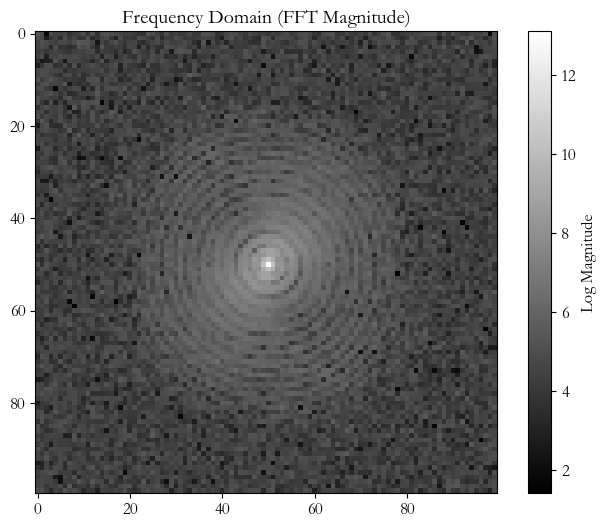

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Jan 25 15:59:16 2025

@author: yanjie
"""

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

#%%
# Define the image path
image_path = "C:\\Users\\PC\\Desktop\\final year project\\pictures\\微信图片_20241223203519.png"
image_path = os.path.expanduser(image_path)  # Expands the ~ to the full home directory path
image = Image.open(image_path).convert("L")  # Convert to grayscale
image_array = np.array(image)

# Step 1: Perform FFT Transform
fft_transform = np.fft.fftshift(np.fft.fft2(image_array))  # Center the zero-frequency component

# Step 2: Show the Image in Frequency Domain
fft_magnitude = np.log1p(np.abs(fft_transform))  # Use log scaling for visualization

plt.figure(figsize=(8, 6))
plt.imshow(fft_magnitude, cmap='gray')
plt.title("Frequency Domain (FFT Magnitude)")
plt.colorbar(label="Log Magnitude")
plt.show()

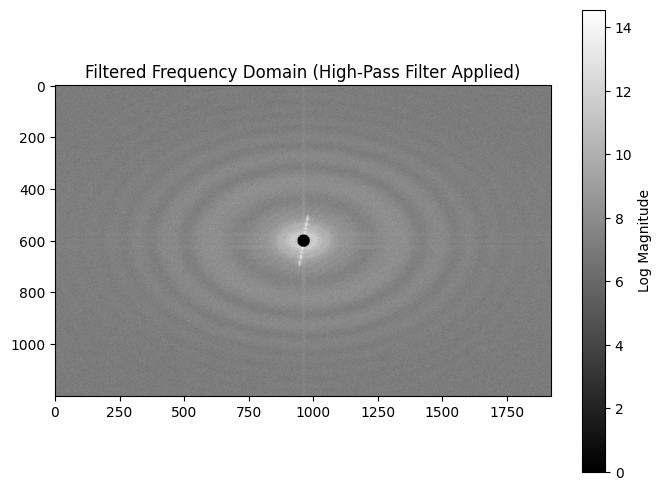

In [2]:

# Step 3: Apply High-Pass Filter
rows, cols = image_array.shape
crow, ccol = rows // 2, cols // 2  # Center
cutoff = 0.02 * min(rows, cols)  # Define cutoff as 10% of max frequency

# Create a high-pass filter mask
mask = np.ones((rows, cols))
y, x = np.ogrid[:rows, :cols]
distance = np.sqrt((x - ccol)**2 + (y - crow)**2)
mask[distance < cutoff] = 0

# Apply the high-pass filter
filtered_fft = fft_transform * mask

# Visualize the filtered FFT
filtered_fft_magnitude = np.log1p(np.abs(filtered_fft))

plt.figure(figsize=(8, 6))
plt.imshow(filtered_fft_magnitude, cmap='gray')
plt.title("Filtered Frequency Domain (High-Pass Filter Applied)")
plt.colorbar(label="Log Magnitude")
plt.show()

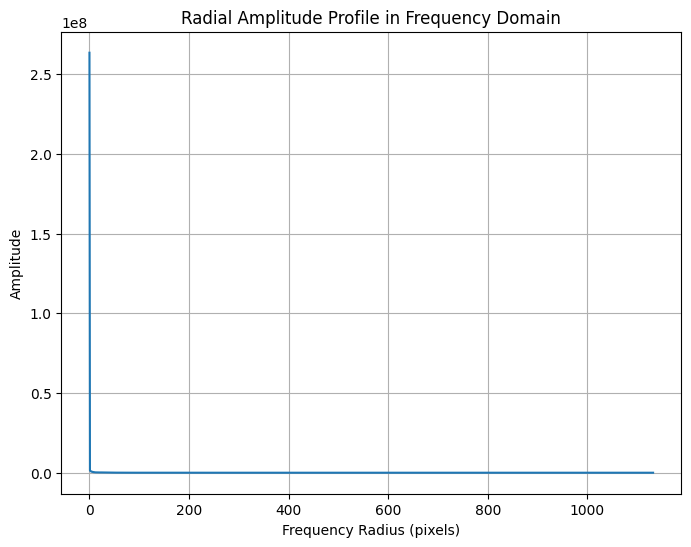

In [3]:

# Step 4: Plot Radial Amplitude Profile in Frequency Domain
r = np.sqrt((x - ccol)**2 + (y - crow)**2).astype(int)
radial_profile = np.bincount(r.ravel(), weights=np.abs(fft_transform).ravel()) / np.bincount(r.ravel())

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(radial_profile)), radial_profile)
plt.title("Radial Amplitude Profile in Frequency Domain")
plt.xlabel("Frequency Radius (pixels)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


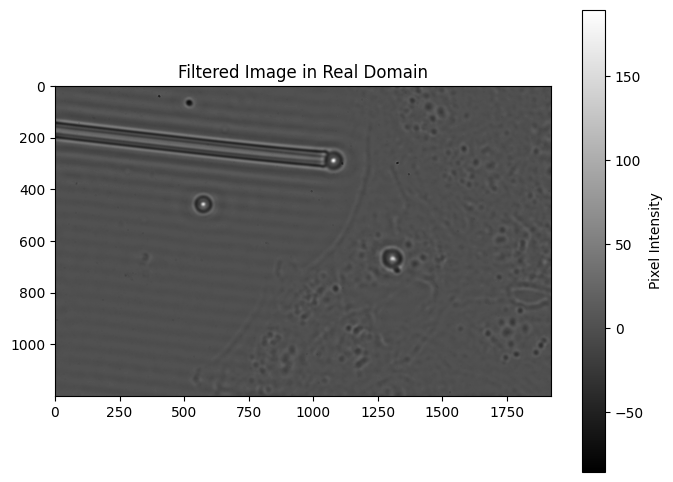

In [4]:
# Step 5: Transform Back to Real Image Domain
filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_fft)).real

plt.figure(figsize=(8, 6))
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image in Real Domain")
plt.colorbar(label="Pixel Intensity")
plt.show()


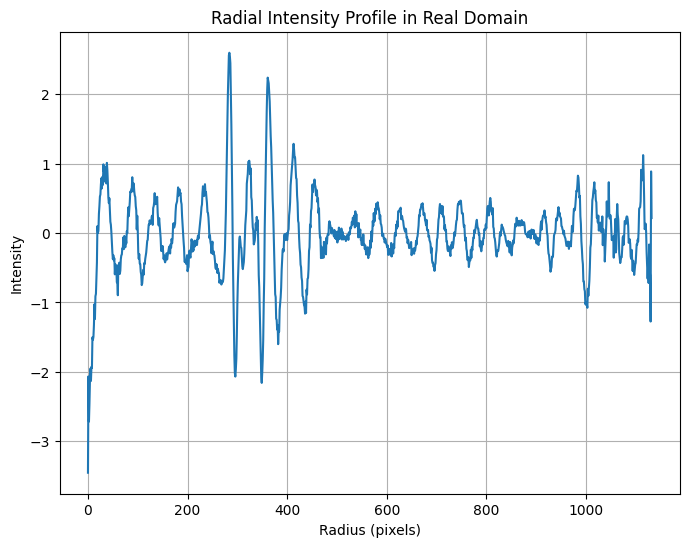

In [5]:
# Step 6: Plot Radial Intensity Profile in Real Image Domain
rows, cols = filtered_image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

r = np.sqrt((x - ccol)**2 + (y - crow)**2).astype(int)
radial_intensity = np.bincount(r.ravel(), weights=filtered_image.ravel()) / np.bincount(r.ravel())

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(radial_intensity)), radial_intensity)
plt.title("Radial Intensity Profile in Real Domain")
plt.xlabel("Radius (pixels)")
plt.ylabel("Intensity")
plt.grid()
plt.show()


In [ ]:
from scipy.signal import correlate2d

# Step 1: Calculate the auto-correlation of the filtered FFT image
fft_autocorr = correlate2d(np.abs(filtered_fft), np.abs(filtered_fft), mode='full')

# Step 2: Normalize for visualization
fft_autocorr_normalized = fft_autocorr / np.max(fft_autocorr)

# Step 3: Plot 2D map of FFT auto-correlation
plt.figure(figsize=(8, 6))
plt.imshow(fft_autocorr_normalized, cmap='hot', extent=[-fft_autocorr.shape[1] // 2, fft_autocorr.shape[1] // 2,
                                                        -fft_autocorr.shape[0] // 2, fft_autocorr.shape[0] // 2])
plt.title("2D Auto-Correlation of FFT Image (High-Pass Filter)")
plt.colorbar(label="Normalized Correlation")
plt.xlabel("X Shift (pixels)")
plt.ylabel("Y Shift (pixels)")
plt.show()


In [14]:
filtered_fft.shape

(100, 100)

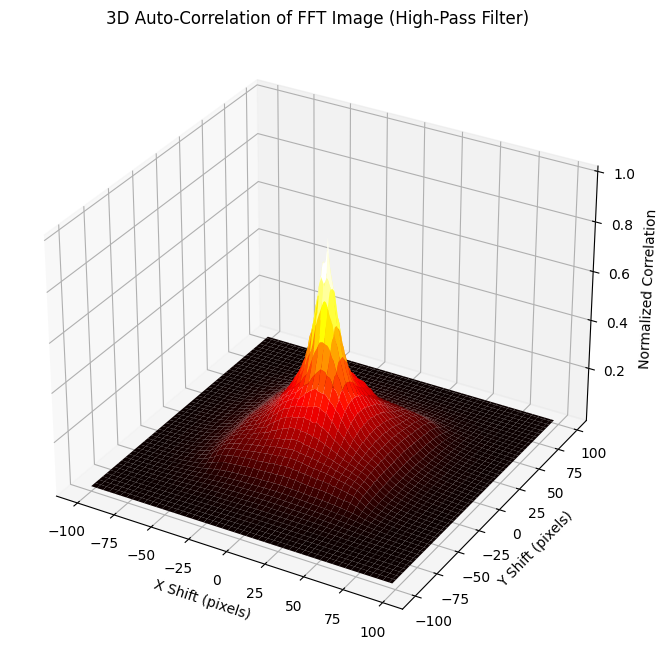

In [7]:
# Step 4: Plot 3D profile of FFT auto-correlation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(-fft_autocorr.shape[1] // 2, fft_autocorr.shape[1] // 2)
y = np.arange(-fft_autocorr.shape[0] // 2, fft_autocorr.shape[0] // 2)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, fft_autocorr_normalized, cmap='hot')
ax.set_title("3D Auto-Correlation of FFT Image (High-Pass Filter)")
ax.set_xlabel("X Shift (pixels)")
ax.set_ylabel("Y Shift (pixels)")
ax.set_zlabel("Normalized Correlation")
plt.show()


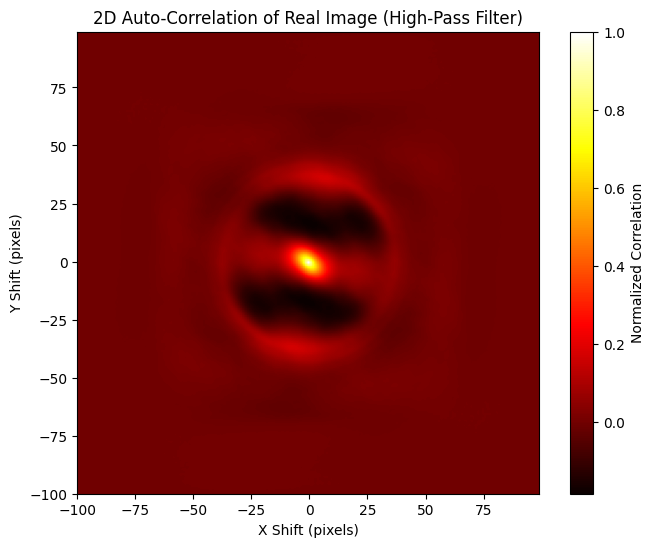

In [8]:
# Step 5: Calculate the auto-correlation of the transformed-back real image
real_autocorr = correlate2d(filtered_image, filtered_image, mode='full')

# Step 6: Normalize for visualization
real_autocorr_normalized = real_autocorr / np.max(real_autocorr)

# Step 7: Plot 2D map of real image auto-correlation
plt.figure(figsize=(8, 6))
plt.imshow(real_autocorr_normalized, cmap='hot', extent=[-real_autocorr.shape[1] // 2, real_autocorr.shape[1] // 2,
                                                         -real_autocorr.shape[0] // 2, real_autocorr.shape[0] // 2])
plt.title("2D Auto-Correlation of Real Image (High-Pass Filter)")
plt.colorbar(label="Normalized Correlation")
plt.xlabel("X Shift (pixels)")
plt.ylabel("Y Shift (pixels)")
plt.show()


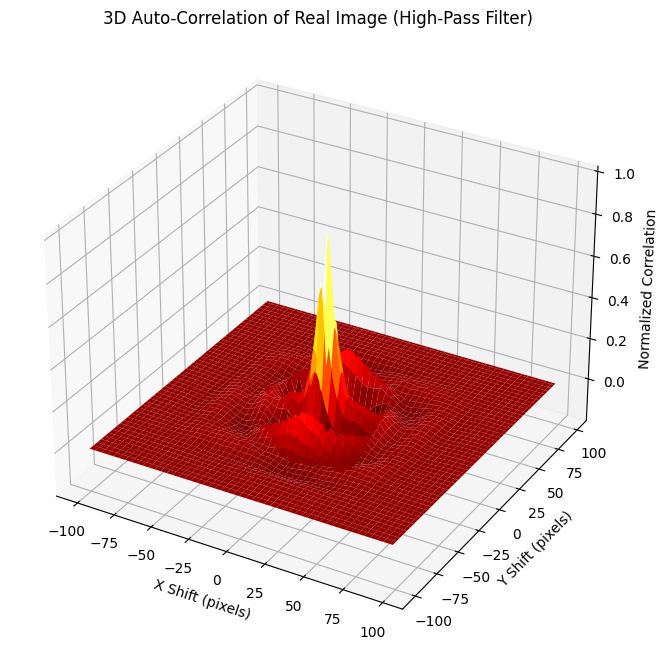

In [9]:
# Step 8: Plot 3D profile of real image auto-correlation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(-real_autocorr.shape[1] // 2, real_autocorr.shape[1] // 2)
y = np.arange(-real_autocorr.shape[0] // 2, real_autocorr.shape[0] // 2)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, real_autocorr_normalized, cmap='hot')
ax.set_title("3D Auto-Correlation of Real Image (High-Pass Filter)")
ax.set_xlabel("X Shift (pixels)")
ax.set_ylabel("Y Shift (pixels)")
ax.set_zlabel("Normalized Correlation")
plt.show()

